Building an Svm model from scratch

In [1]:
import numpy as np

SVM Classifier

In [2]:
class SVM_classifier():

    # initializing the hyperparameters
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter
    
    # fitting the data
    def fit(self, X, Y):

        self.m, self.n = X.shape # no. of rows and columns

        # initializing weights and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # implementing the gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):

        # label encoding
        y_label = np.where(self.Y <=0 , -1, 1)

        # defining the gradients
        for index, x_i in enumerate(self.X): # enumerate gives index value and number
            condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >=1 

            if (condition == True):
                dw = 2 * self.lambda_parameter * self.w
                db = 0

            else:
                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i , y_label[index])
                db = y_label[index]

        # updating the weights and bias
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db


    def predict(self, X):

        output = np.dot(X, self.w) - self.b
        predicted_labels = np.sign(output) 

        y_cap = np.where(predicted_labels <= -1, 0, 1)

        return y_cap

Implementing the SVM Classifier

In [3]:
# importing the libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data collection and processing

In [ ]:
diabetes_data = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Project/ML/Supervised_Model/diabetes.csv')

In [5]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Statistics of data
print(diabetes_data.shape)
diabetes_data.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Outcome
0    500
1    268
Name: count, dtype: int64


<Axes: xlabel='Outcome', ylabel='count'>

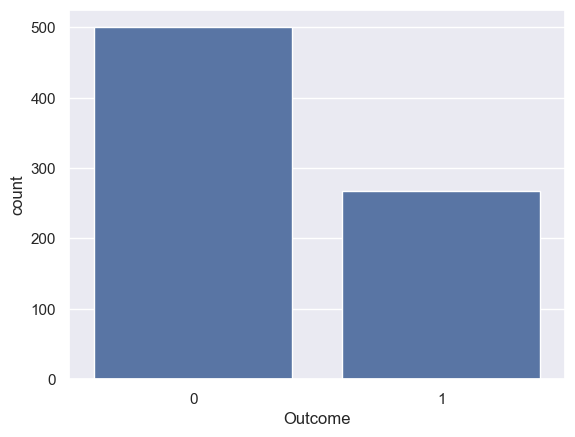

In [7]:
# Checking the outcome distribution
print(diabetes_data['Outcome'].value_counts())

sns.set_theme()
sns.countplot(data= diabetes_data, x='Outcome')


In [8]:
# Grouping by outcome
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
# separating the features and targets
X = diabetes_data.drop(columns= 'Outcome', axis=1)
Y = diabetes_data['Outcome']

print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Data Standardization

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X)

,copy,True
,with_mean,True
,with_std,True


In [12]:
X_std = scaler.transform(X)
print(X_std)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


Train Test Split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2, random_state=2, stratify=Y)

In [14]:
print(X_std.shape,X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training a model using SVM classifier

In [15]:
classifier = SVM_classifier(learning_rate=0.05, no_of_iterations=1000, lambda_parameter=0.01)

In [16]:
# training a svm classifier
classifier.fit(X_train, Y_train)

Model Evaluation

In [17]:
# Accuracy on training data
X_train_pred = classifier.predict(X_train)
training_accuracy = accuracy_score(X_train_pred, Y_train)

In [18]:
print('Accuracy on training data : ', training_accuracy)

Accuracy on training data :  0.7035830618892508


In [19]:
# Accuracy on test data
X_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(X_test_pred, Y_test)

In [20]:
print('Accuracy on test data : ', test_accuracy)

Accuracy on test data :  0.7272727272727273


Building a Predictive System

In [21]:
input_data = (10,168,74,0,0,38,0.537,34)

# change the input data to numpy array
input_numpy = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_reshaped = input_numpy.reshape(1,-1)

# standardize the data
input_std = scaler.transform(input_reshaped)
print(input_std)

# making a prediction
prediction = classifier.predict(input_std)
print(prediction)

if(prediction[0] == 0):
    print('The person is non-diabetic')

else:
    print('The person has diabetes')

[[ 1.82781311  1.4742667   0.25303625 -1.28821221 -0.69289057  0.76245745
   0.1966813   0.06459135]]
[1]
The person has diabetes


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
